## Визуализация торгов за день
- по реальным записям из базы
- тестовые торговые алгоритмы

In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
import os
from dotenv import load_dotenv

load_dotenv()

TOKEN = os.getenv("INVEST_TOKEN")

TICKER = 'RNFT'
FIGI = 'BBG00F9XX7H4'

10:00 - Pretest. RSI = 0.46
10:00 - Change config to step 5/0(2) x 1.4 rub, |s0 b0| pre+
10:00 - INIT 
     figi - BBG00F9XX7H4 (RNFT)
     max_shares - 5
     base_shares - 0
     step_size - 1.4 RUR
     step_cnt - 2
     threshold_buy_steps - 0
     threshold_sell_steps - 0
     cur_used_cnt - 0
10:00 - Orders: buy [], sell [] 
10:00 - Buy order set, price -119.0 n=0)
10:00 - Buy order set, price -117.6 n=0)
10:01 - Orders: buy [119.0, 117.6], sell [] 
10:01 - Buy order set, price -119.0 n=0)
10:02 - Orders: buy [119.0, 117.6, 119.0], sell [] 
10:02 - Buy order set, price -119.0 n=0)
10:03 - Orders: buy [119.0, 117.6, 119.0, 119.0], sell [] 
10:03 - Buy order set, price -119.0 n=0)
10:04 - Orders: buy [119.0, 117.6, 119.0, 119.0, 119.0], sell [] 
11:46 - No candle for 2023-05-29 08:46:00
12:23 - No candle for 2023-05-29 09:23:00
12:34 - No candle for 2023-05-29 09:34:00
13:06 - No candle for 2023-05-29 10:06:00
13:31 - No candle for 2023-05-29 10:31:00
13:53 - No candle for 2023-05-

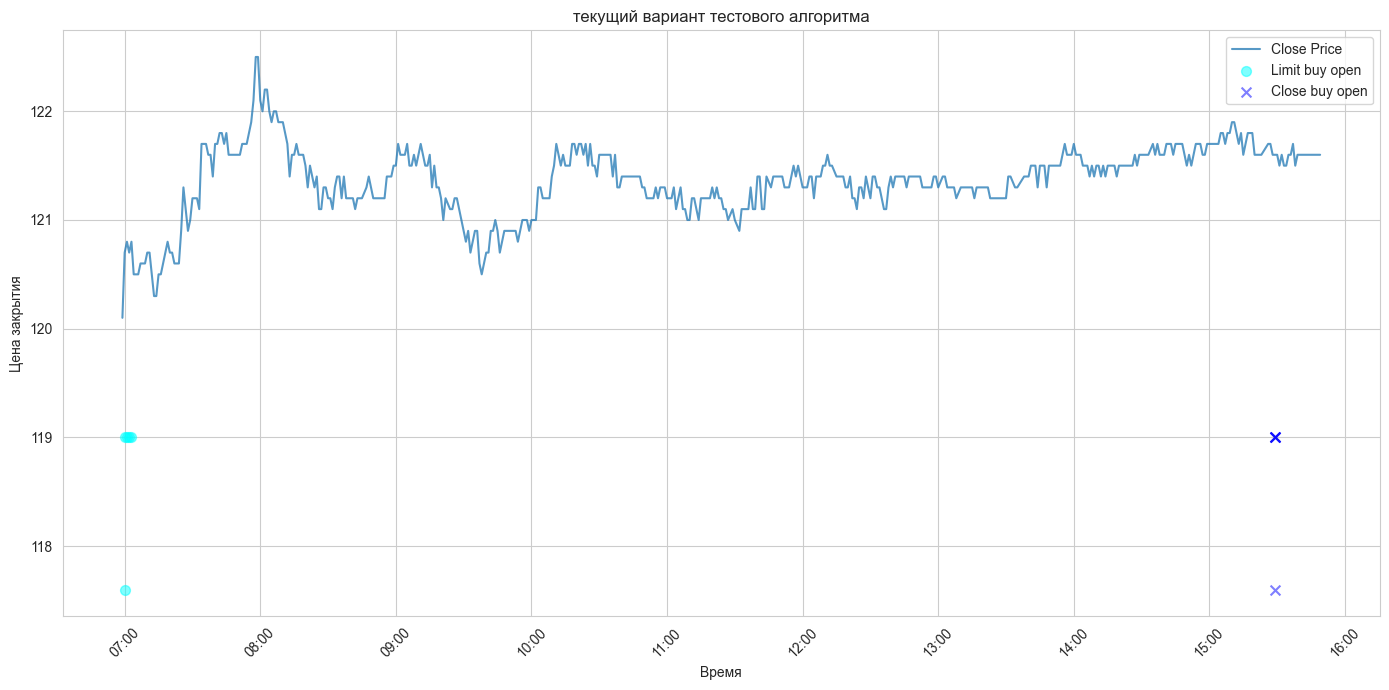

In [11]:
from trader_bot import ConfigDTO
from datetime import datetime
from lib.visaualize import Visualize
from lib.historical_candles import HistoricalCandles
from lib.historical_trade import HistoricalTrade
from test_env.test_alg import TestAlgorithm

historical_trade = HistoricalTrade()
data_handler = HistoricalCandles(TOKEN, FIGI, TICKER)

# date = '2024-03-14'

# проблемные зоны - тут идет лютый спад и всё сливается
# date = '2023-08-04'
# date = '2023-05-02'
# date = '2023-08-25'
# date = '2023-09-07'
# date = '2023-09-11'
# date = '2023-09-19'

# тут резкий скачок и перестает идти торговля
# date = '2023-09-12'

date = None

# alg_name = '-' #'v5_t60'
alg_name = None #'v5_t60'

viz = Visualize(data_handler)

def show_test_alg(date_):
    if date_ is None:
        date_ = datetime.now().strftime('%Y-%m-%d')
    
    test_alg = TestAlgorithm(TOKEN, TICKER, FIGI, do_printing=False)
    
    result = test_alg.test(
        last_test_date = date_,
        test_days_num = 1, # тут берем всегда только 1 день для этого файла
        shares_count=0,
    
        config=ConfigDTO(
            start_time='07:00',  # 10:45
            end_time='15:29',  # 18:15
        
            max_shares=5,
            base_shares=5,
            step_size=1.4,
            step_cnt=2,
            threshold_buy_steps=6,
            threshold_sell_steps=0,
            do_pretest=True,
            
            sleep_trading=1 * 60,
        ),
    )
    
    print(f"День: {date_}, 'тестовый', Итог: {result['profit']}, Записей: {result['op_cnt']}")
    print(result)
    
    viz.draw(
        date_, 
        test_alg.accounting_helper.get_deals(),
        test_alg.accounting_helper.get_orders(),
        'текущий вариант тестового алгоритма'
    )

results = historical_trade.get_daily_totals(date, alg_name)

for obj in results:
    print(f"День: {obj.date}, {obj.alg_name}, "
          f"{'Итог' if obj.is_closed else 'Подытог'}: {obj.total}, "
          f"Записей: {obj.cnt}")
    viz.draw(
        obj.date, 
        historical_trade.get_deals(obj.date, obj.alg_name), 
        [],
        obj.alg_name
    )

show_test_alg(date)